In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\dhruv\Documents\ML\ML_pw\Logistic_project_1\datasets\diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
df.size

6912

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
## we know that glucose bloodpressure will never be zero 

In [9]:
df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].mean())

In [10]:
df["BloodPressure"] = df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].mean())
df["BMI"] = df["BMI"].replace(0,df["BMI"].mean())

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

In [13]:
## so this is a binary classification problem

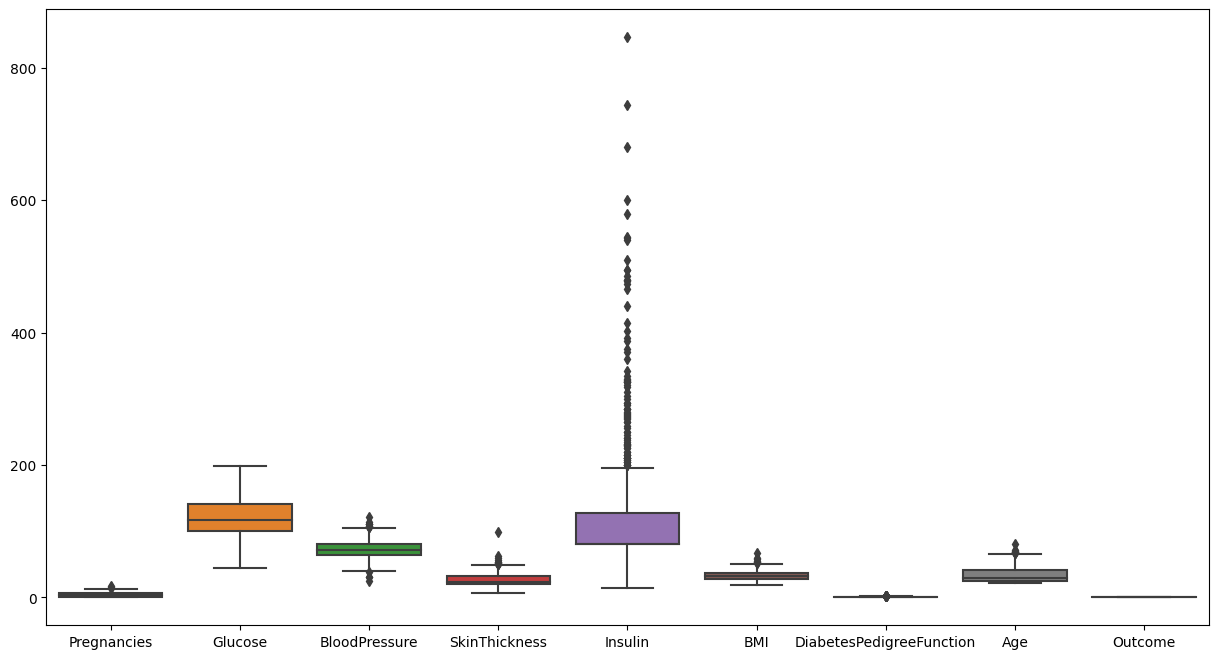

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(df)
plt.show()

In [15]:
## split the data

In [16]:
X = df.drop("Outcome",axis=1)
Y = df["Outcome"]

In [17]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [18]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [19]:
import pickle
def standard_scaler(x_train,x_test):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    file = open(r"C:\Users\dhruv\Documents\ML\ML_pw\Logistic_project_1\models\scaler.pkl",'wb')
    pickle.dump(scaler,file)
    file.close()

    return x_train,x_test

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [21]:
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((231, 8), (537, 8), (231,), (537,))

In [22]:
X_train_scaled,X_test_scaled = standard_scaler(X_train,X_test) 

In [23]:
X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95.0,60.0,18.0,58.0,23.9,0.260,22
139,5,105.0,72.0,29.0,325.0,36.9,0.159,28
485,0,135.0,68.0,42.0,250.0,42.3,0.365,24
547,4,131.0,68.0,21.0,166.0,33.1,0.160,28
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33


In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [25]:
X_train_scaled.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.836294,-0.895858,-0.993708,-0.901990,-0.652054,-1.203405,-0.614216,-0.948610
1,0.390728,-0.563749,-0.010679,0.290338,2.219844,0.664904,-0.909738,-0.434667
2,-1.143050,0.432578,-0.338355,1.699453,1.413131,1.440971,-0.306991,-0.777296
3,0.083972,0.299735,-0.338355,-0.576810,0.509613,0.118783,-0.906812,-0.434667
4,-0.836294,-0.630171,-3.451280,1.265879,-0.383149,1.584687,-0.839515,-0.006380


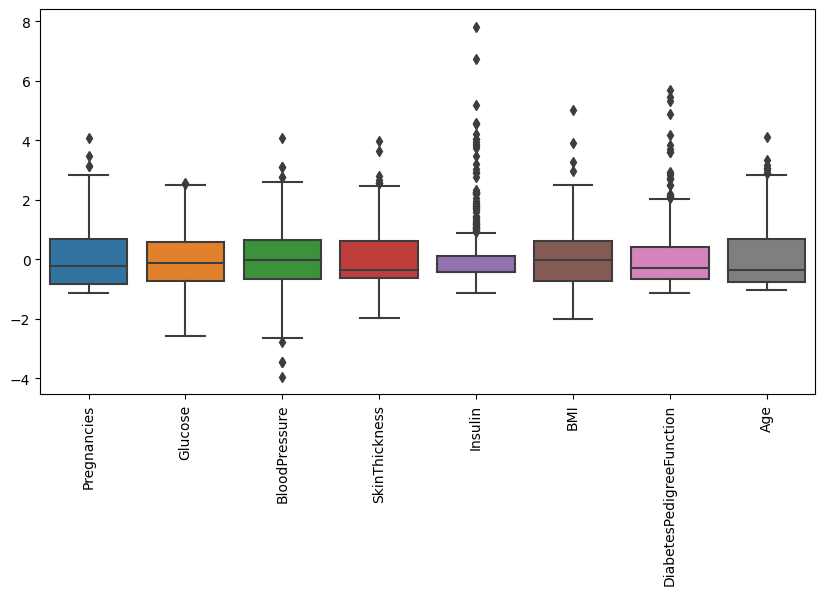

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(X_train_scaled)
plt.xticks(rotation=90)
plt.show()

In [27]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [28]:
X_test_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.697483,-0.796225,-1.157546,0.723912,0.767761,0.248128,-0.116804,0.850192
1,-0.529539,-0.331272,0.235078,0.615519,-0.417575,0.492445,-0.941923,-1.034268
2,-0.529539,-0.464116,-0.666032,-0.627054,-0.417575,-0.211764,-0.912664,-1.034268
3,1.310994,-0.497327,0.644673,-0.627054,-0.417575,-1.102804,1.129653,0.079277
4,1.004239,0.465789,1.463864,-0.627054,-0.417575,-0.341108,-0.760514,1.449793


In [29]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
619    1
198    1
538    0
329    0
302    0
Name: Outcome, Length: 231, dtype: int64

In [30]:
y_train

334    0
139    0
485    1
547    0
18     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 537, dtype: int64

In [31]:
logistic =LogisticRegression()
logistic.fit(X_train_scaled,y_train)
y_predict = logistic.predict(X_test_scaled)
print("accuracy score is : ",accuracy_score(y_test,y_predict))
print("confusion matrix :",confusion_matrix(y_test,y_predict))

accuracy score is :  0.7402597402597403
confusion matrix : [[124  27]
 [ 33  47]]


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
params = {
    "penalty": ("l1", "l2", "elasticnet", None),
    "C" : np.arange(-3,3),
    "solver" : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
log = LogisticRegression()
log_cv = GridSearchCV(log,param_grid=params,cv=10,scoring="accuracy")

log_cv.fit(X_train_scaled,y_train)
print(log_cv.best_params_)

{'C': 1, 'penalty': None, 'solver': 'lbfgs'}


In [36]:
logistic_model = LogisticRegression(penalty=None , C=1,solver="lbfgs")

In [37]:
logistic_model.fit(X_train_scaled,y_train)

LogisticRegression(C=1, penalty=None)

In [38]:
y_pre = logistic_model.predict(X_test_scaled)

In [39]:
print("the accuracy of the model is :",accuracy_score(y_test,y_pre)*100,"%")
print("confusion matrix :",confusion_matrix(y_test,y_pre))
print("classification report :",classification_report(y_test,y_pre))

the accuracy of the model is : 74.45887445887446 %
confusion matrix : [[124  27]
 [ 32  48]]
classification report :               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [40]:
file = open(r"C:\Users\dhruv\Documents\ML\ML_pw\Logistic_project_1\models\logisticmodel.pkl","wb")
pickle.dump(logistic_model,file)
file.close()


In [42]:
## done 

Pregnancies=0
Glucose=85
BloodPressure=90
SkinThickness=40
Insulin=300
BMI=40
DiabetesPedigreeFunction = 0.190
Age = 20

In [47]:
scaler = pickle.load(open(r"C:\Users\dhruv\Documents\ML\ML_pw\Logistic_project_1\models\scaler.pkl","rb"))

In [50]:
x = scaler.transform([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])

In [49]:
model = pickle.load(open(r"C:\Users\dhruv\Documents\ML\ML_pw\Logistic_project_1\models\logisticmodel.pkl","rb")) 

In [52]:
model.predict(x)[0]

0